0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


<Axes: >

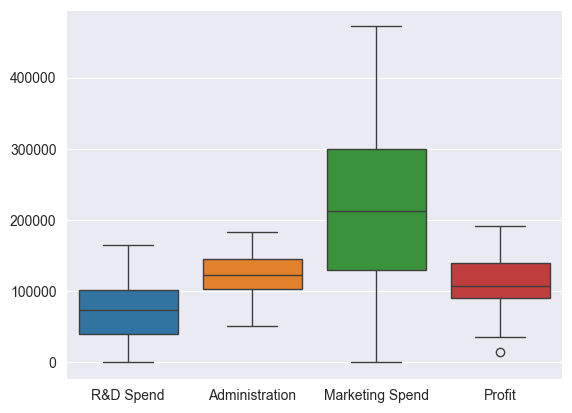

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

dataset=pd.read_csv("C:/Users/ASUS/Downloads/Startups.csv")
dataset
print(dataset.duplicated().sum())
print(dataset.isnull().sum())
sns.boxplot(data=dataset,orient="v")

<Axes: ylabel='Profit'>

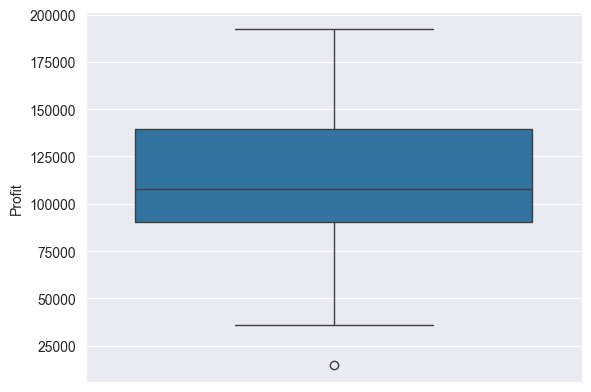

In [2]:
sns.boxplot(data=dataset.Profit,orient="v")


In [80]:
dataset[dataset.Profit <  25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [81]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

X=pd.get_dummies(X,drop_first=True,dtype=int)
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['R&D Spend','Administration','Marketing Spend']
sc = sc.fit(X_train[cols])
X_train[cols] = sc.transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])
X_train.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
33,-0.350065,-0.785471,0.101197,1,0
35,-0.555303,-1.481174,0.027350,0,1
26,0.079358,0.801334,-0.551521,1,0
34,-0.546382,1.325058,0.070117,0,0
18,0.434854,-0.355987,0.751485,1,0


In [83]:
X_train[cols].mean()
X_train[cols].std()

R&D Spend          1.012739
Administration     1.012739
Marketing Spend    1.012739
dtype: float64

In [84]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_,regressor.intercept_)
regressor.score(X_train, y_train)



[35726.28774249   851.30163448  4519.88277698  -959.28416006
   699.36905252] 109441.48912163253


0.9501847627493607

In [85]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9347068473282424

In [86]:
df= pd.DataFrame(data=[[140000,10000,35000,0,0]],columns=X.columns)
df[cols]=sc.transform(df[cols])
regressor.predict(df)[0]


152449.77148092195

In [87]:
z = sc.transform([[140000,10000,35000]])
z = np.append(z,[0,0])
z= z.reshape(1,5)
regressor.predict(z)[0]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


152449.77148092195